In [6]:
# First let's import the packages we will use in this project

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'C:\Users\visha\Downloads\movies\movies.csv')

In [73]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct year
5445,386,5,0,2009,527,7.8,1100000.0,785,1264,1534,47,237000000,2847246203,1382,162.0,29
7445,388,5,0,2019,137,8.4,903000.0,105,514,1470,47,356000000,2797501328,983,181.0,39
3045,4912,5,6,1997,534,7.8,1100000.0,785,1264,1073,47,200000000,2201647264,1382,194.0,17
6663,3645,5,0,2015,529,7.8,876000.0,768,1807,356,47,245000000,2069521700,945,138.0,35
7244,389,5,0,2018,145,8.4,897000.0,105,514,1470,47,321000000,2048359754,983,149.0,38


In [8]:
# checking for missing values
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [16]:
# removing null values 
df.dropna(subset=['rating', 'budget','gross'], inplace=True)




In [17]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [19]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [24]:
# converting floats to integers and removing decimals from speicfic columns
df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')

In [25]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [52]:
# Sorting the gross column in descending order
df= df.sort_values(by= ['gross'], inplace= False, ascending= False)

In [41]:
pd.set_option('display.max_rows', None)

In [47]:
#drop any dupicate values/ only unique values
df.drop_duplicates(inplace= True)

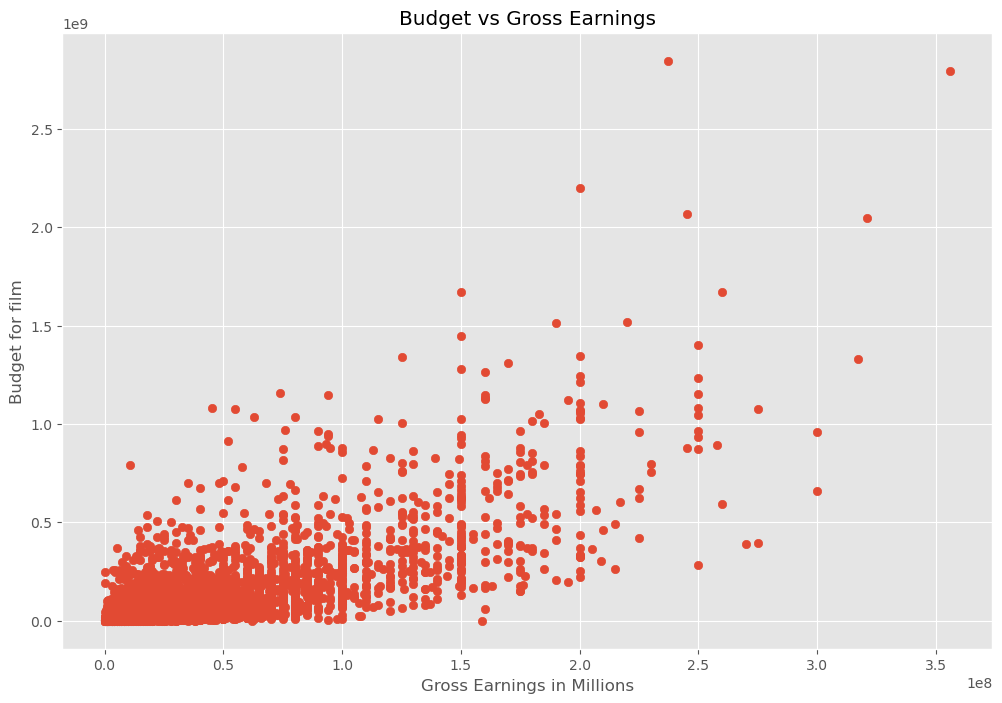

In [48]:
# performing correlation budget vs gross(individual variables)

plt.scatter(x=df['budget'], y =df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings in Millions')
plt.ylabel('Budget for film')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

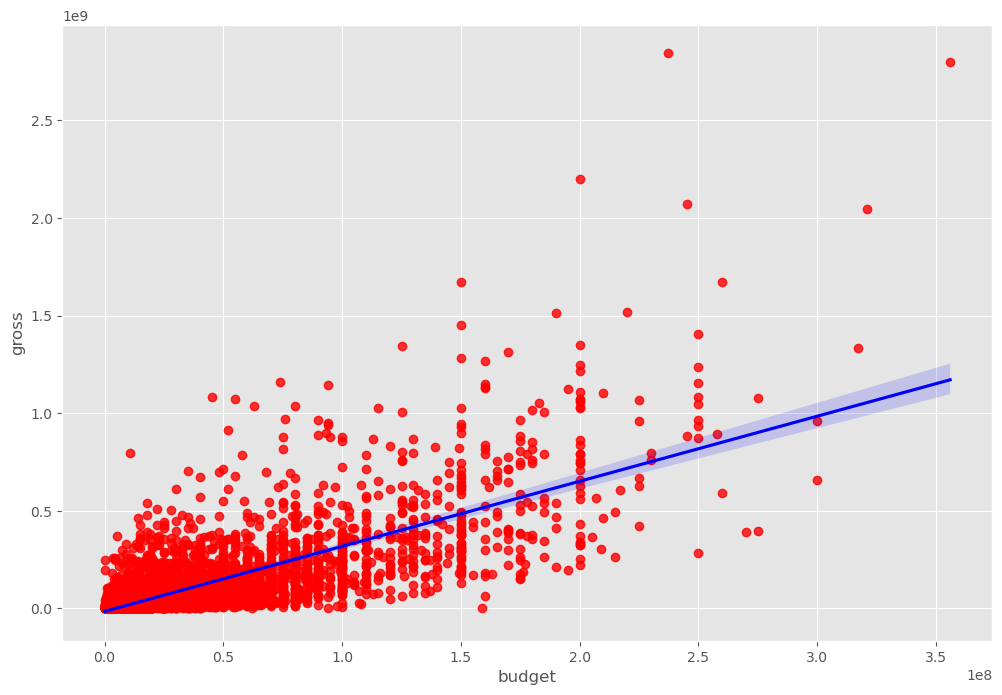

In [50]:
# regplot for ehanced visulation using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws= {"color":"red"}, line_kws={"color":"Blue"})

In [74]:
# converting strings to numeric for correlation analysis
df.numerized = df
for col_name in df.numerized.columns:
    if (df.numerized[col_name].dtype == 'object'):
        df.numerized[col_name]= df.numerized[col_name].astype('category')
        df.numerized[col_name]= df.numerized[col_name].cat.codes # for numeric conversion
df.numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct year
5445,386,5,0,2009,527,7.8,1100000.0,785,1264,1534,47,237000000,2847246203,1382,162.0,29
7445,388,5,0,2019,137,8.4,903000.0,105,514,1470,47,356000000,2797501328,983,181.0,39
3045,4912,5,6,1997,534,7.8,1100000.0,785,1264,1073,47,200000000,2201647264,1382,194.0,17
6663,3645,5,0,2015,529,7.8,876000.0,768,1807,356,47,245000000,2069521700,945,138.0,35
7244,389,5,0,2018,145,8.4,897000.0,105,514,1470,47,321000000,2048359754,983,149.0,38


In [69]:
df.numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct year
name,1.000000,-0.029271,0.010838,0.025441,-0.005783,0.014521,0.012585,0.015320,0.013143,-0.006788,-0.025467,0.023336,0.005613,0.021592,0.010949,0.025441
rating,-0.029271,1.000000,0.147569,0.020085,0.018011,0.066335,0.006321,0.014381,-0.002966,0.009693,0.008061,-0.203531,-0.181590,-0.091306,0.140886,0.020085
genre,0.010838,0.147569,1.000000,-0.073532,0.021952,0.035126,-0.135954,-0.008507,0.016969,0.003026,-0.009185,-0.368521,-0.244034,-0.071608,-0.059367,-0.073532
year,0.025441,0.020085,-0.073532,1.000000,-0.002033,0.056506,0.206161,-0.038676,-0.025486,-0.031559,-0.066833,0.327961,0.274395,-0.013187,0.075173,1.000000
released,-0.005783,0.018011,0.021952,-0.002033,1.000000,0.046131,0.028810,0.002499,0.008480,0.015881,-0.017225,0.019835,0.008492,-0.002539,0.009172,-0.002033
score,0.014521,0.066335,0.035126,0.056506,0.046131,1.000000,0.474349,0.005294,0.012896,0.007683,-0.043207,0.072155,0.222709,0.021241,0.414145,0.056506
votes,0.012585,0.006321,-0.135954,0.206161,0.028810,0.474349,1.000000,-0.010499,-0.005288,-0.017377,0.041443,0.439757,0.614808,0.118850,0.352331,0.206161
director,0.015320,0.014381,-0.008507,-0.038676,0.002499,0.005294,-0.010499,1.000000,0.261595,0.036372,0.011209,-0.009814,-0.029664,-0.008712,0.017437,-0.038676
writer,0.013143,-0.002966,0.016969,-0.025486,0.008480,0.012896,-0.005288,0.261595,1.000000,0.018941,0.022496,-0.039307,-0.035842,-0.003287,-0.017340,-0.025486
star,-0.006788,0.009693,0.003026,-0.031559,0.015881,0.007683,-0.017377,0.036372,0.018941,1.000000,-0.010125,-0.021159,0.000218,0.014958,0.010312,-0.031559


In [75]:
# correlation matrix using pearson  method
correlation_mat = df.numerized.corr()
corr_pairs =correlation_mat.unstack()
corr_pairs.head()

name  name        1.000000
      rating     -0.029271
      genre       0.010838
      year        0.025441
      released   -0.005783
dtype: float64

In [71]:
# pairing up of matrix

sorted_pairs = corr_pairs.sort_values()
sorted_pairs.

genre         budget         -0.368521
budget        genre          -0.368521
genre         gross          -0.244034
gross         genre          -0.244034
rating        budget         -0.203531
budget        rating         -0.203531
rating        gross          -0.181590
gross         rating         -0.181590
genre         votes          -0.135954
votes         genre          -0.135954
rating        company        -0.091306
company       rating         -0.091306
genre         year           -0.073532
year          genre          -0.073532
genre         correct year   -0.073532
correct year  genre          -0.073532
company       genre          -0.071608
genre         company        -0.071608
country       correct year   -0.066833
correct year  country        -0.066833
country       year           -0.066833
year          country        -0.066833
genre         runtime        -0.059367
runtime       genre          -0.059367
score         country        -0.043207
country       score      

In [72]:
# Variables with high correlation
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

gross         votes           0.614808
votes         gross           0.614808
budget        gross           0.740263
gross         budget          0.740263
correct year  year            1.000000
year          correct year    1.000000
name          name            1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
correct year  correct year    1.000000
dtype: float64